# MODEL AGNOSTIC TEST BDEO

This notebook allows to perform a model agnostic test, allowing two different framework to be compared. The only stric requiremnt is that the model produces, as output, a feature vector that is used to compare images.

In [1]:
import os 
import sys

import numpy as np
import glob
from PIL import Image
partial_path = os.getcwd().rsplit("/", 1)[0]
sys.path.insert(0, f"{partial_path}/src/")
sys.path.insert(0, f"{partial_path}/src/deep-person-reid/")
import config as cf
import torchreid
from torchreid.utils import FeatureExtractor
from test_utils import test_agnostic_get_metrics, test_agnostic_show_pics

/4TB_Disk/Image_Analytics/dev/similarity_paper/src/deep-person-reid/torchreid/metrics/rank.py:12: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  'Cython evaluation (very fast so highly recommended) is '


### TEST SET DEFINITION

Test images have to be in the form "../{damage_id}_{photo_id}.*"

In [2]:
base_path = '../data/test_BDEO_remapped/'
print(len(os.listdir(base_path)))
all_files = glob.glob(os.path.join(base_path, '*'))

385


### MODEL DEFINITION

In [3]:
model_path=cf.SIMILARITY_BEST_WEIGHTS_PATH

In [4]:
extractor = FeatureExtractor(
    model_name='osnet_ain_x1_0',
    model_path=model_path,
    device='cuda'
)

Successfully loaded imagenet pretrained weights from "/home/e3eferri/.cache/torch/checkpoints/osnet_ain_x1_0_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
Model: osnet_ain_x1_0
- params: 2,193,616
- flops: 978,878,352
Successfully loaded pretrained weights from "../models/model_similarity_best/osnet_sim_v2.tar"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']


### FEATURE AND INDEXES EXTRACTION

In [5]:
query=[]
gallery=[]

puntatore=0
for path in all_files:
    dam_id=int(os.path.basename(path).split('_')[0])
    if dam_id==puntatore:
        query.append(path)
        puntatore+=1
    elif dam_id==puntatore-1:
        gallery.append(path)
    else:
        puntatore+=1

In [6]:
query_feat=extractor(query).cpu()
gallery_feat=extractor(gallery).cpu()

In [7]:
query_idx=np.array([int(os.path.basename(path).split('_')[0]) for path in query])
gallery_idx=np.array([int(os.path.basename(path).split('_')[0]) for path in gallery])

### GET RESULTS 

In [8]:
# test_agnostic_show_pics(query,query_idx,  query_feat,
#                gallery,gallery_idx,  gallery_feat)

  0%|          | 0/132 [00:00<?, ?it/s]

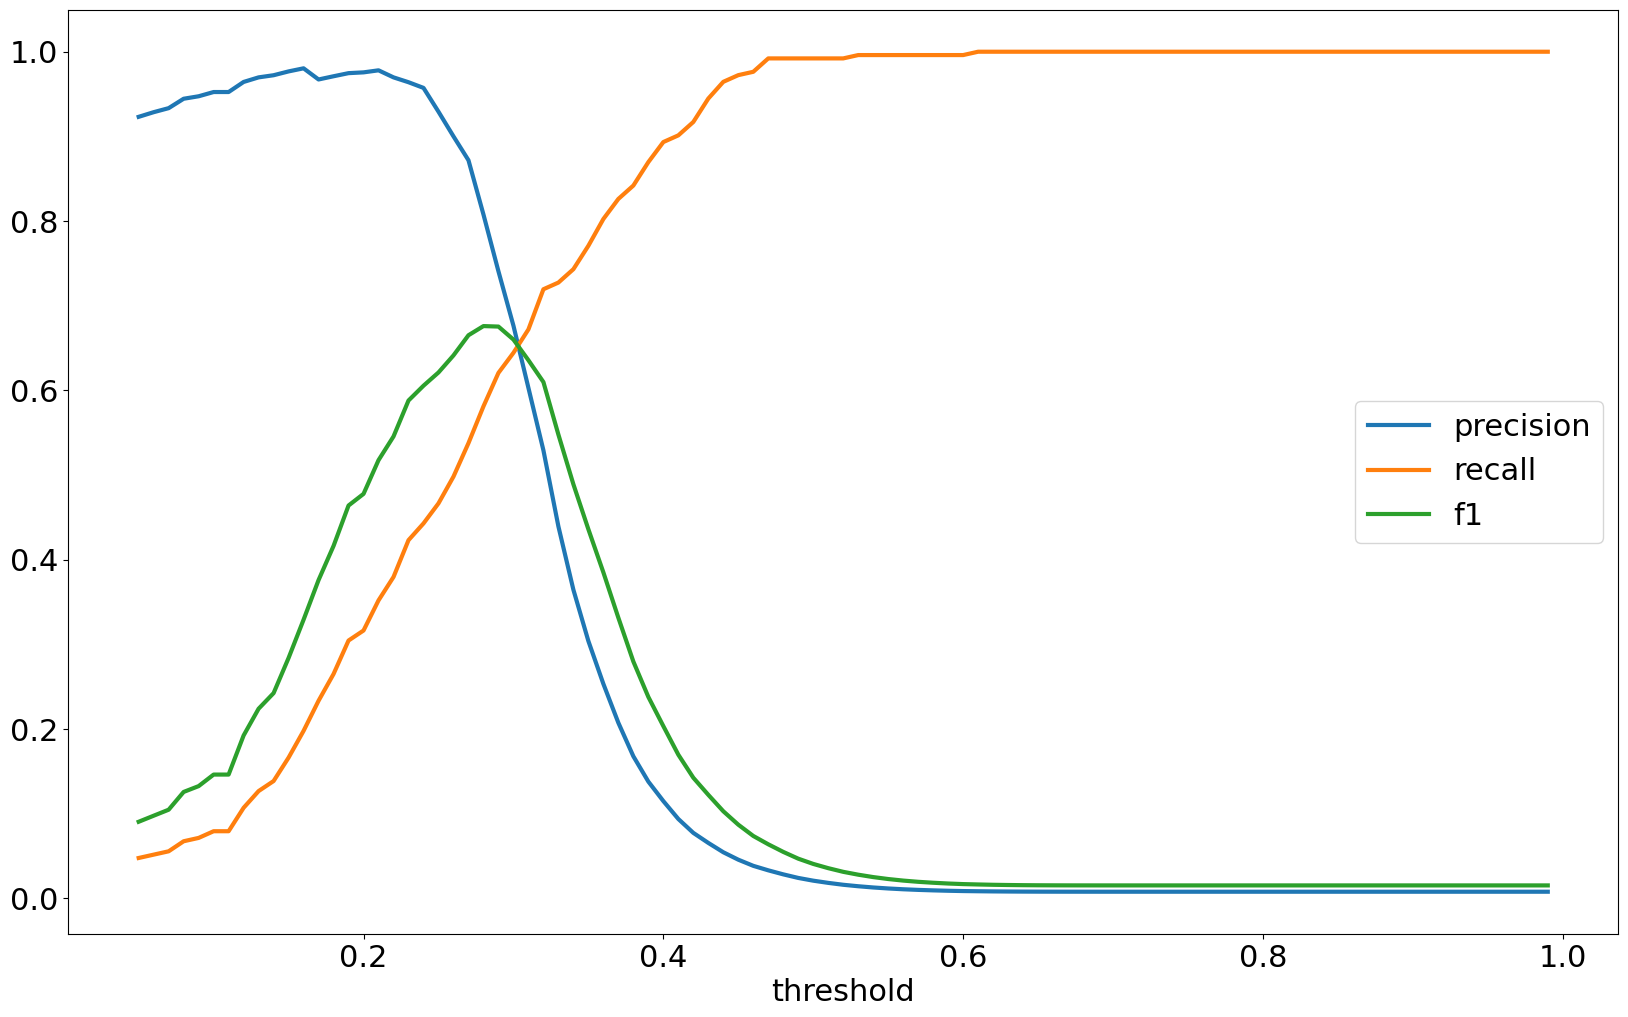

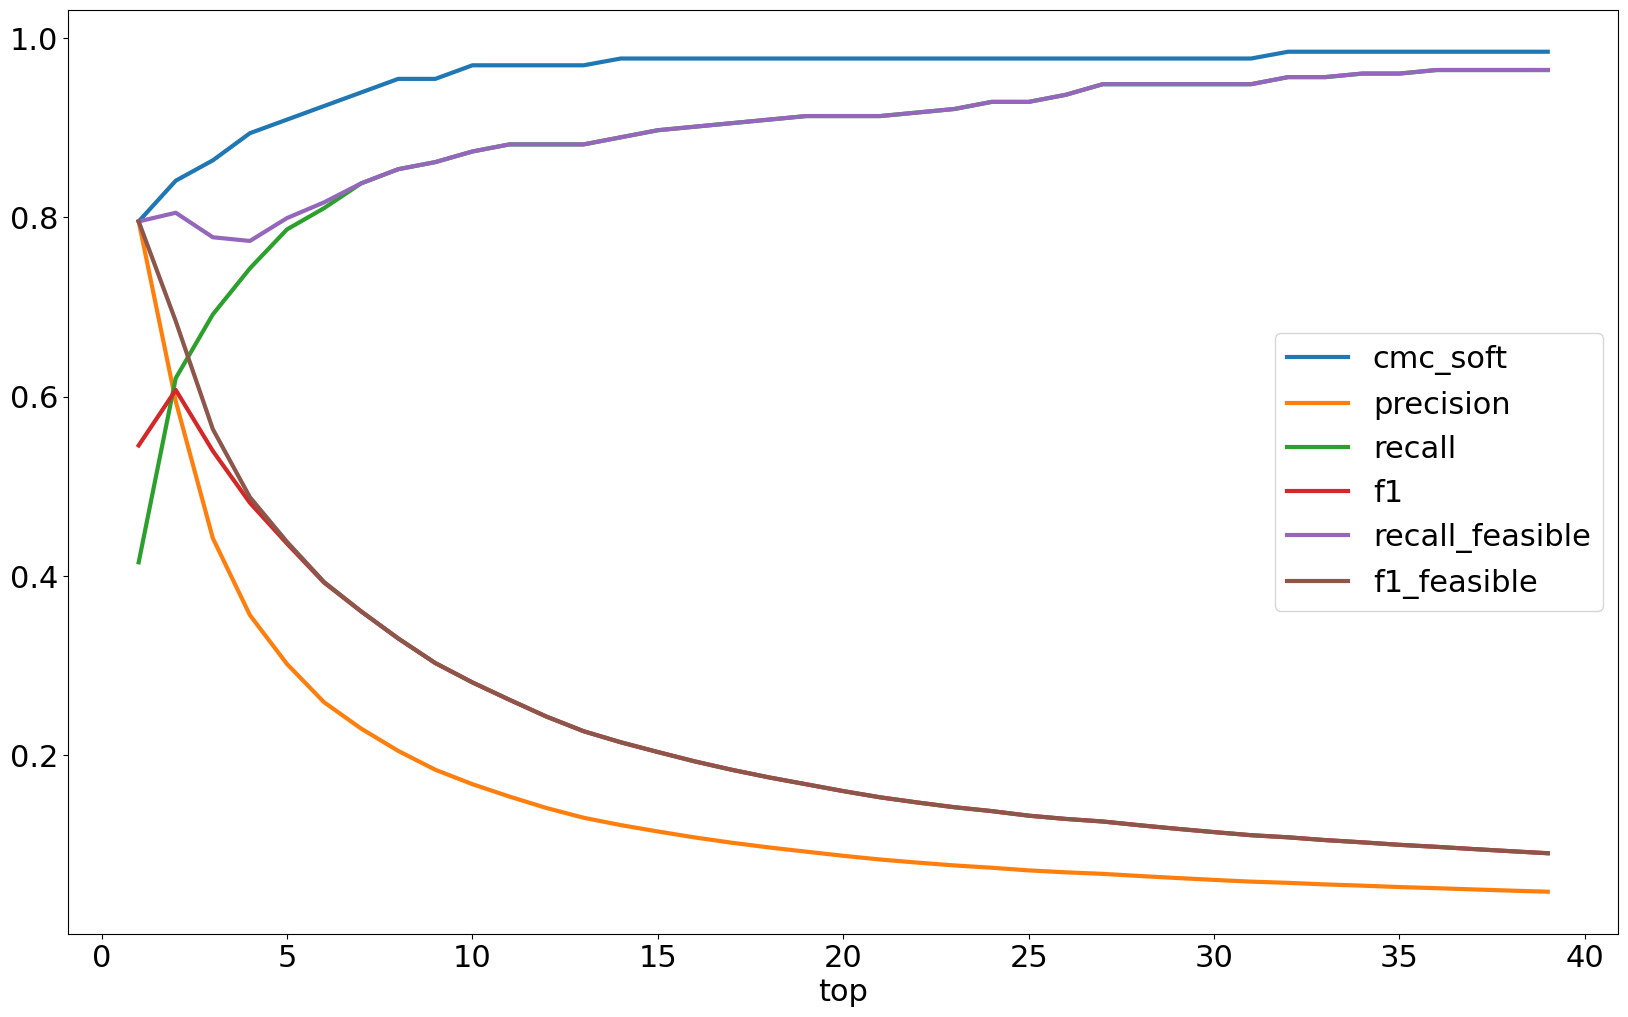

In [9]:
out=test_agnostic_get_metrics(query,query_idx,  query_feat,
               gallery,gallery_idx,  gallery_feat, 
               thresholds=np.arange(0.05,1,0.01), top=list(reversed(range(40)))[0:-1])

In [10]:
out=test_agnostic_get_metrics(query,query_idx,  query_feat,
               gallery,gallery_idx,  gallery_feat, 
               thresholds=np.arange(0.1,0.3,0.02), top=(10, 5, 3, 1),
               display_metrics=True, plot_curves=False)

  0%|          | 0/132 [00:00<?, ?it/s]

,top,precision,recall,recall_feasible,f1,f1_feasible,cmc_soft
top_10,10,0.167424,0.873518,0.873518,0.280992,0.280992,0.969697
top_5,5,0.301515,0.786561,0.799197,0.435926,0.437844,0.909091
top_3,3,0.441919,0.691700,0.777778,0.539291,0.563607,0.863636
top_1,1,0.795455,0.415020,0.795455,0.545455,0.795455,0.795455


,threshold,precision,recall,f1
trash_0.1,0.10,0.952381,0.079051,0.145985
trash_0.12,0.12,0.964286,0.106719,0.192171
trash_0.14,0.14,0.972222,0.138340,0.242215
trash_0.16,0.16,0.980392,0.197628,0.328947
trash_0.18,0.18,0.971014,0.264822,0.416149
trash_0.2,0.20,0.975610,0.316206,0.477612
trash_0.22,0.22,0.969697,0.379447,0.545455
trash_0.24,0.24,0.957265,0.442688,0.605405
trash_0.26,0.26,0.900000,0.498024,0.641221
trash_0.28,0.28,0.807692,0.581028,0.675862


In [11]:
out=test_agnostic_get_metrics(query,query_idx,  query_feat,
               gallery,gallery_idx,  gallery_feat, 
               thresholds=np.arange(0.1,1,0.005), top=list(reversed(range(40)))[0:-1], 
               get_summary_metrics=True, plot_curves=False)

  0%|          | 0/132 [00:00<?, ?it/s]

mean average precision (mAP) is: 0.792
top-1 soft-positive Cumulative Matching Characteristics (CMC) is: 0.795
top-5 f1 feasible is : top_5    0.438
Name: f1_feasible, dtype: float64
top-10 f1 feasible is: top_10    0.281
Name: f1_feasible, dtype: float64
recall at 0.95 is:  0.455
recall at 0.9 is:  0.498
recall at 0.5 is:  0.723
